In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, mean_squared_error, r2_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


In [2]:
covid_data = pd.read_csv("Covid Dataset.csv")

In [3]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [4]:
covid_data.shape

(5434, 21)

In [5]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [6]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [7]:
covid_data.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [8]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [9]:
# create a table with data missing 
missing_values=covid_data.isnull().sum() # missing values

percent_missing = covid_data.isnull().sum()/covid_data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


<Axes: >

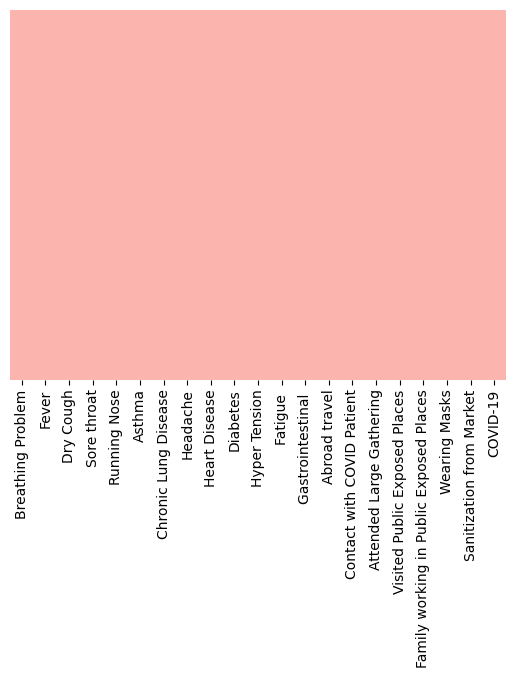

In [10]:
sns.heatmap(covid_data.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

C:\Users\komal kumari\AppData\Local\Temp\ipykernel_28440\1578201493.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='COVID-19',data=covid_data, palette="PuRd")


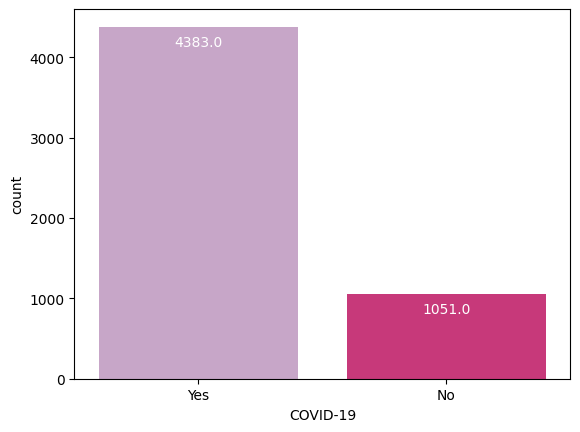

In [11]:
ax = sns.countplot(x='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

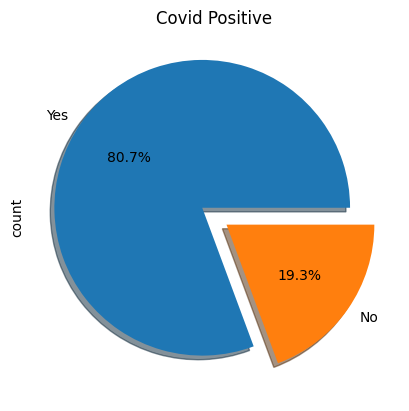

In [12]:
covid_data["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

C:\Users\komal kumari\AppData\Local\Temp\ipykernel_28440\3679949964.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Breathing Problem',data=covid_data, palette="Set1")


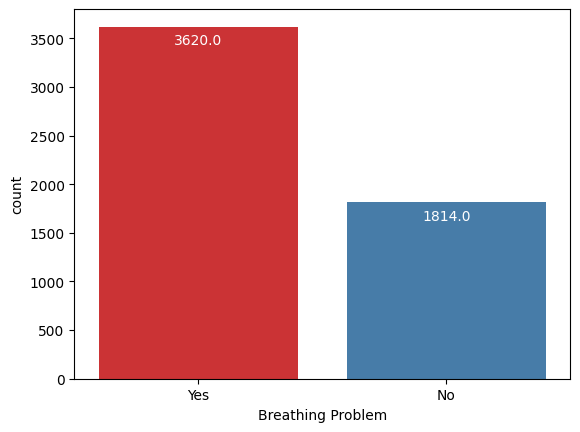

In [13]:
ax = sns.countplot(x='Breathing Problem',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

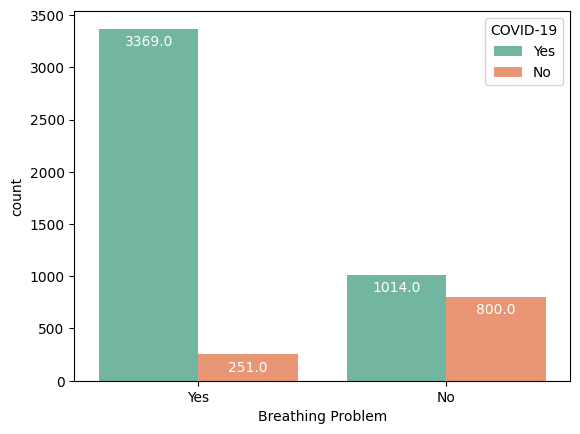

In [14]:
ax = sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

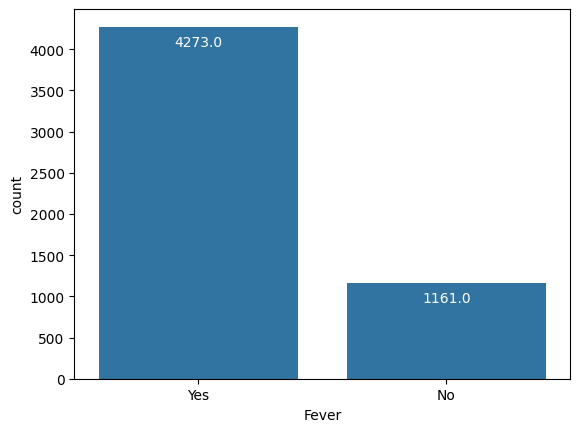

In [15]:
ax = sns.countplot(x='Fever',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

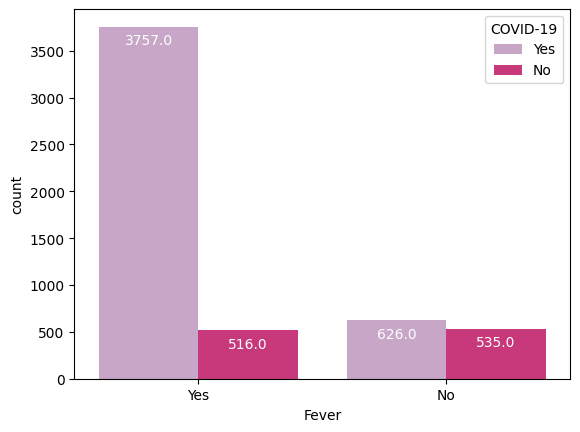

In [16]:
ax = sns.countplot(x='Fever',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

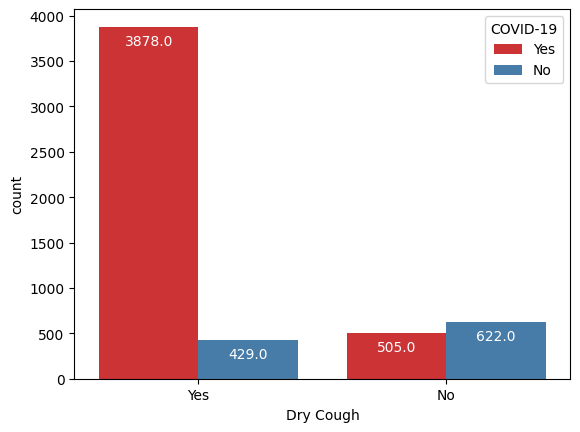

In [17]:
ax = sns.countplot(x='Dry Cough',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

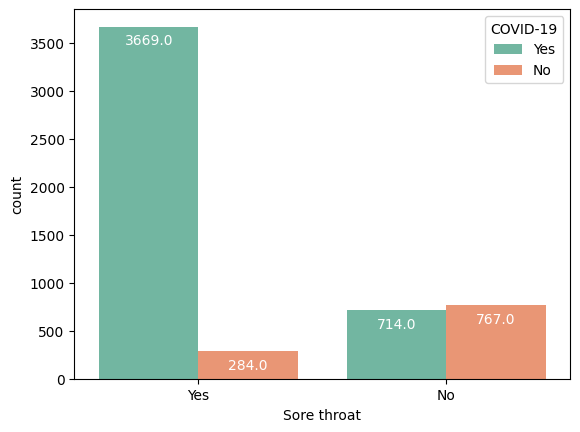

In [18]:
ax = sns.countplot(x='Sore throat',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

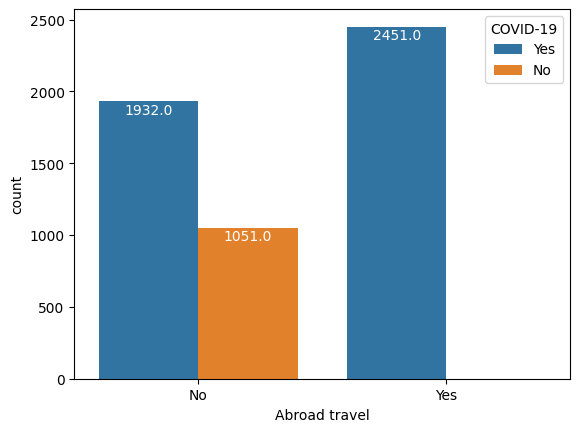

In [19]:
ax = sns.countplot(x='Abroad travel',hue='COVID-19',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

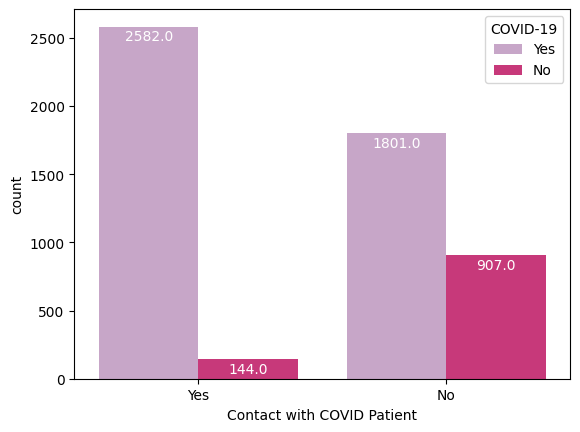

In [20]:
ax = sns.countplot(x='Contact with COVID Patient',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

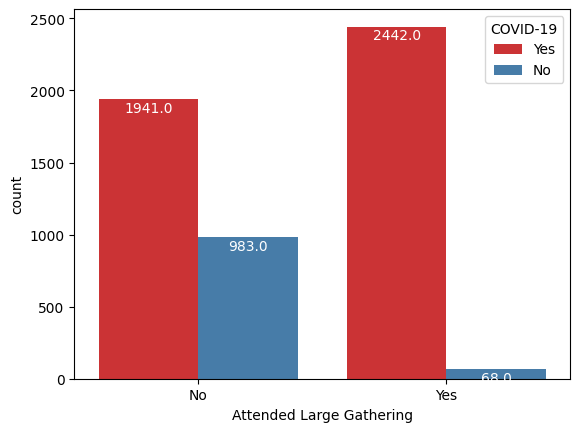

In [21]:
ax = sns.countplot(x='Attended Large Gathering',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

In [22]:
e=LabelEncoder()

In [23]:
covid_data['Breathing Problem']=e.fit_transform(covid_data['Breathing Problem'])
covid_data['Fever']=e.fit_transform(covid_data['Fever'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Running Nose']=e.fit_transform(covid_data['Running Nose'])
covid_data['Asthma']=e.fit_transform(covid_data['Asthma'])
covid_data['Chronic Lung Disease']=e.fit_transform(covid_data['Chronic Lung Disease'])
covid_data['Headache']=e.fit_transform(covid_data['Headache'])
covid_data['Heart Disease']=e.fit_transform(covid_data['Heart Disease'])
covid_data['Diabetes']=e.fit_transform(covid_data['Diabetes'])
covid_data['Hyper Tension']=e.fit_transform(covid_data['Hyper Tension'])
covid_data['Abroad travel']=e.fit_transform(covid_data['Abroad travel'])
covid_data['Contact with COVID Patient']=e.fit_transform(covid_data['Contact with COVID Patient'])
covid_data['Attended Large Gathering']=e.fit_transform(covid_data['Attended Large Gathering'])
covid_data['Visited Public Exposed Places']=e.fit_transform(covid_data['Visited Public Exposed Places'])
covid_data['Family working in Public Exposed Places']=e.fit_transform(covid_data['Family working in Public Exposed Places'])
covid_data['Wearing Masks']=e.fit_transform(covid_data['Wearing Masks'])
covid_data['Sanitization from Market']=e.fit_transform(covid_data['Sanitization from Market'])
covid_data['COVID-19']=e.fit_transform(covid_data['COVID-19'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Gastrointestinal ']=e.fit_transform(covid_data['Gastrointestinal '])
covid_data['Fatigue ']=e.fit_transform(covid_data['Fatigue '])

In [24]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [25]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


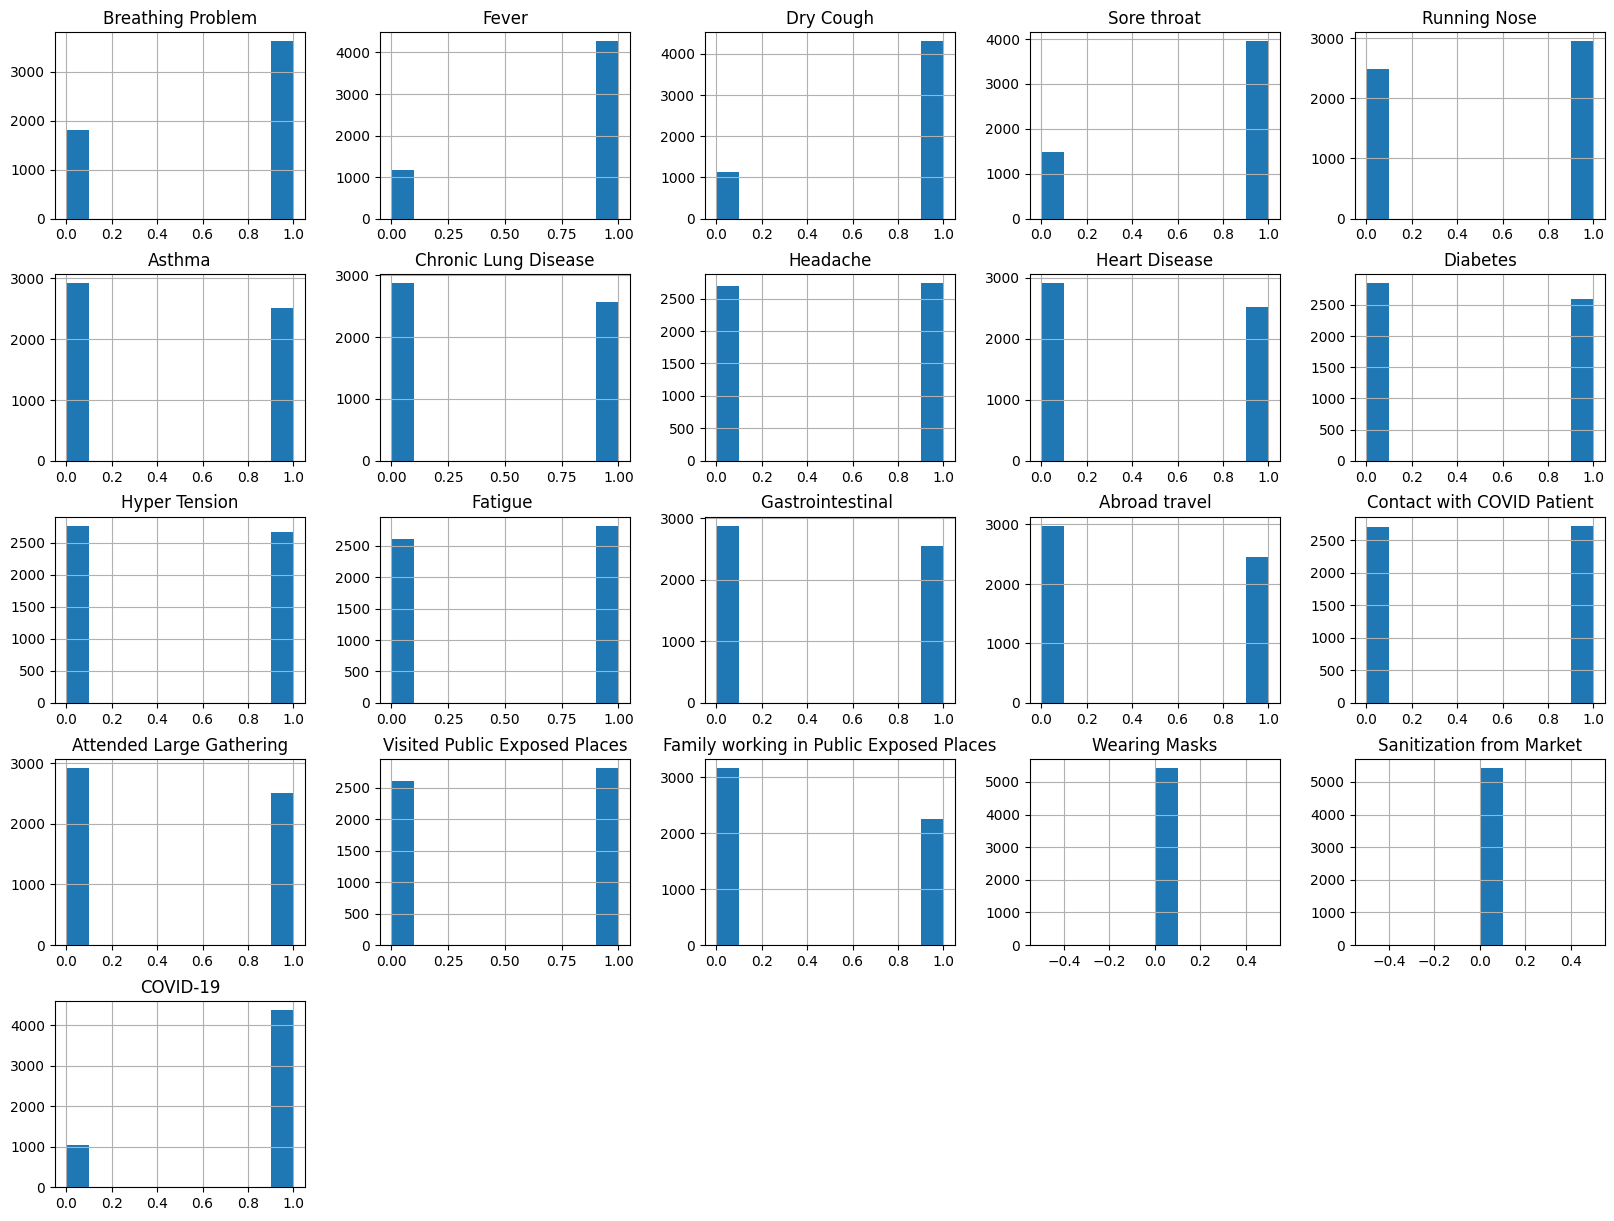

In [26]:
covid_data.hist(figsize=(20,15));

Wearing Masks
0    5434
Name: count, dtype: int64


<Axes: xlabel='Wearing Masks', ylabel='count'>

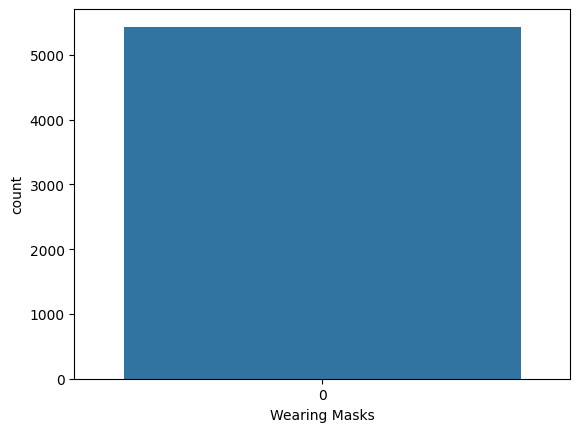

In [27]:
print(covid_data['Wearing Masks'].value_counts())
sns.countplot(x='Wearing Masks',data=covid_data)

Sanitization from Market
0    5434
Name: count, dtype: int64


<Axes: xlabel='Sanitization from Market', ylabel='count'>

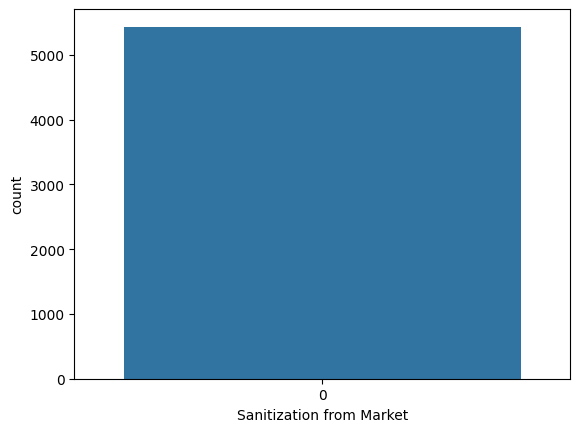

In [28]:
print(covid_data['Sanitization from Market'].value_counts())
sns.countplot(x='Sanitization from Market',data=covid_data)

In [29]:
covid_data=covid_data.drop('Wearing Masks',axis=1)
covid_data=covid_data.drop('Sanitization from Market',axis=1)

In [30]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

<Axes: >

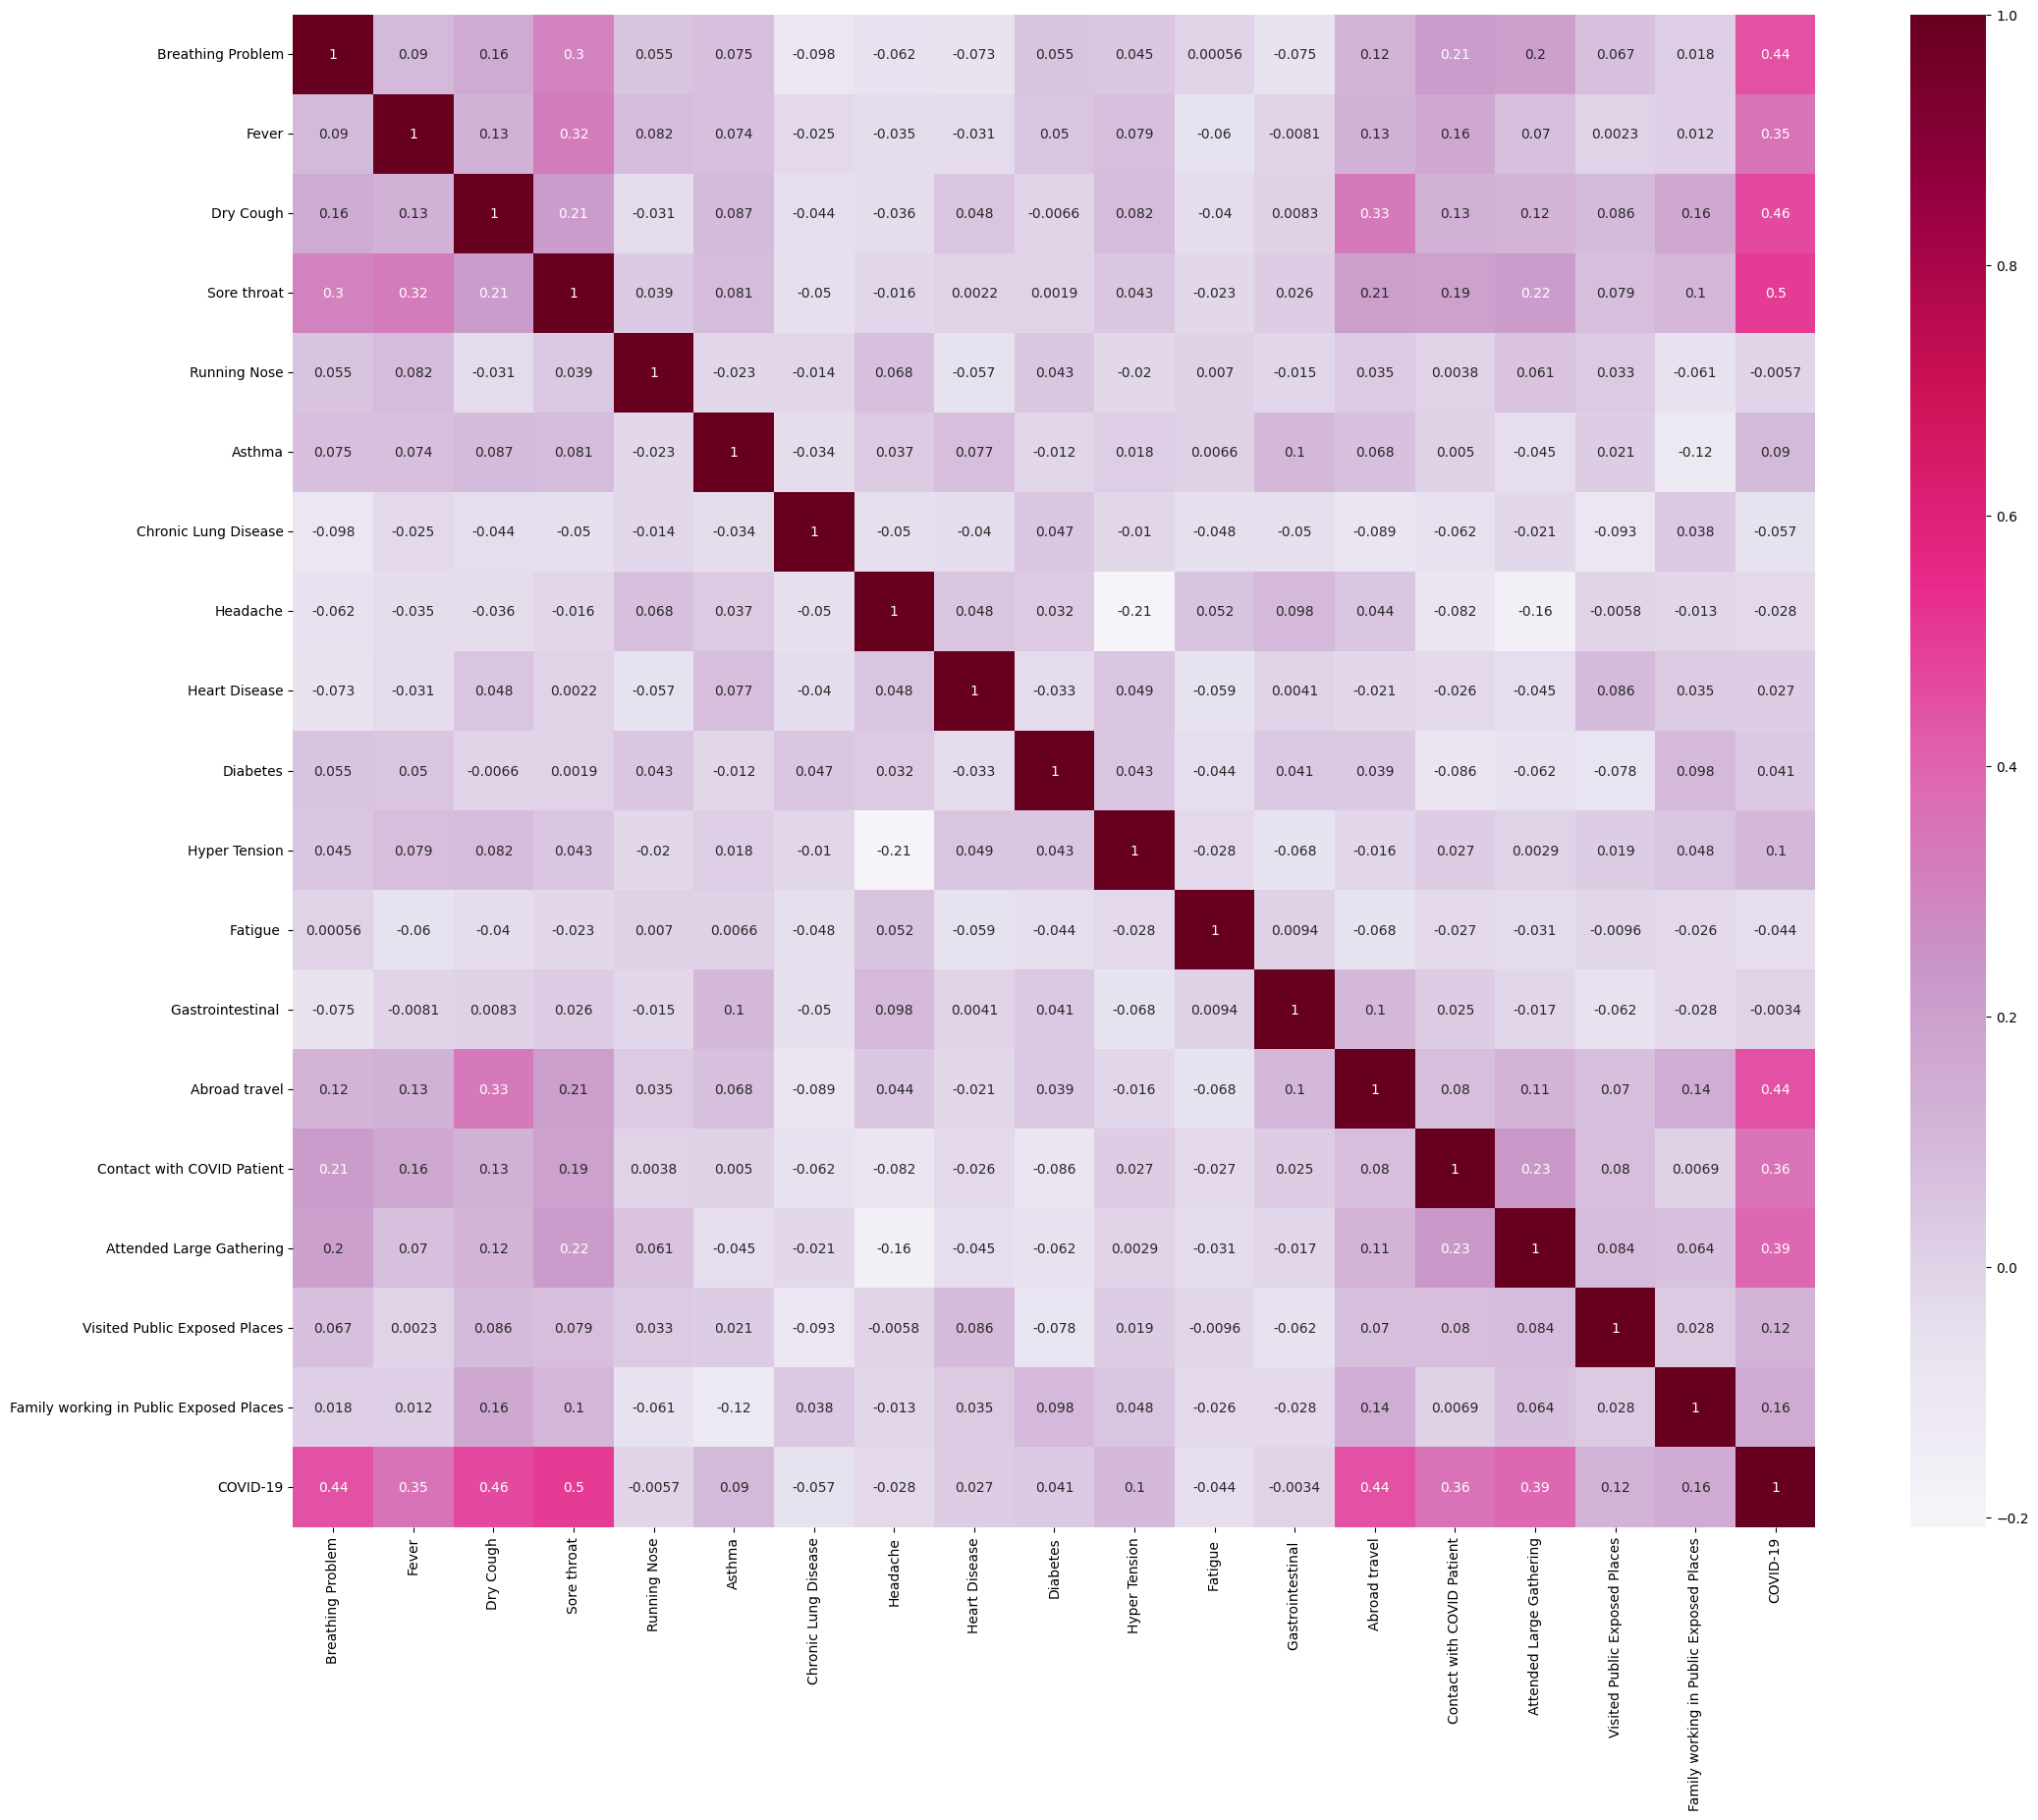

In [31]:
plt.figure(figsize=(25,20))
sns.heatmap(covid_data.corr(), annot=True, cmap="PuRd")

In [41]:
x=covid_data.drop('COVID-19',axis=1)
y=covid_data['COVID-19']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [42]:
accuracies = {}
r2_scores = {}
gmeans = {}
algo_time={}
r2_scores={}
mean_squared_errors={}
roc_auc_scores={}
specificities = {}
sensitivities = {}
precisions = {}


In [43]:
"""

def print_performance2(yt, clf, clf_name, cost_matrix=None):
    y_pred = clf.predict(x_test)

    # Confusion Matrix
    cm = confusion_matrix(yt, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Standard Metrics
    roc_auc_scores[clf_name] = roc_auc_score(yt, y_pred) * 100
    mean_squared_errors[clf_name] = mean_squared_error(yt, y_pred) * 100
    r2_scores[clf_name] = r2_score(yt, y_pred) * 100
    accuracies[clf_name] = clf.score(x_train, y_train) * 100

    # Advanced Metrics
    precision = precision_score(yt, y_pred)
    recall = recall_score(yt, y_pred)  # Sensitivity
    specificity = tn / (tn + fp)
    gmean = np.sqrt(recall * specificity)

    precisions[clf_name] = precision
    sensitivities[clf_name] = recall
    specificities[clf_name] = specificity
    gmeans[clf_name] = gmean

    # Print metrics
    print(f"\n--- {clf_name} Evaluation ---")
    print(f"ROC_AUC Score: {roc_auc_scores[clf_name]:.2f}%")
    print(f"Mean Squared Error: {mean_squared_errors[clf_name]:.2f}%")
    print(f"R2 Score: {r2_scores[clf_name]:.2f}%")
    print(f"Accuracy Score: {accuracies[clf_name]:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Sensitivity (Recall): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G-Mean: {gmean:.4f}")
    print("\nClassification Report:\n", classification_report(yt, y_pred))

    # Show Original Confusion Matrix
    print("\nConfusion Matrix (Before Cost Matrix):")
    print(cm)

    # Apply Cost Matrix (if provided)
    if cost_matrix is not None:
        cost_cm = cm * cost_matrix
        total_cost = np.sum(cost_cm)

        print("\nCost-sensitive Confusion Matrix (After Cost Matrix):")
        print(cost_cm)
        print("\nTotal Cost:", total_cost)

    # Plotting Side-by-Side Confusion Matrices
    fig, ax = plt.subplots(1, 2 if cost_matrix is not None else 1, figsize=(12, 5))

    # Plot Original Confusion Matrix
    ax[0].matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(2):
        for j in range(2):
            ax[0].text(j, i, cm[i, j], ha='center', va='center', fontsize=14)
    ax[0].set_title('Confusion Matrix (Original)')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')

    # Plot Cost-sensitive Confusion Matrix
    if cost_matrix is not None:
        ax[1].matshow(cost_cm, cmap=plt.cm.Purples, alpha=0.3)
        for i in range(2):
            for j in range(2):
                ax[1].text(j, i, cost_cm[i, j], ha='center', va='center', fontsize=14)
        ax[1].set_title('Cost-sensitive Confusion Matrix')
        ax[1].set_xlabel('Predicted')
        ax[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()"""

"""
original_accuracies = accuracies.copy()
my_cost_matrix = np.array([[1, -0.5],  # Actual 0 (Negative): TN, FP
                           [-1, 1]])

cost_based_accuracies = {}

def print_performance2(yt, clf, clf_name, cost_matrix=None):
    y_pred = clf.predict(x_test)

    # Standard Confusion Matrix
    cm = confusion_matrix(yt, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Original Accuracy (before cost matrix)
    original_accuracy = clf.score(x_train, y_train) * 100
    original_accuracies[clf_name] = original_accuracy

    # Apply Cost Matrix (if provided)
    total_cost = 0
    if cost_matrix is not None:
        cost_cm = cm * cost_matrix
        total_cost = np.sum(cost_cm)

    # After applying cost matrix: Adjust "accuracy" based on total cost (lower cost is better)
    cost_based_accuracy = 100 - (total_cost / np.sum(cm)) * 100  # Adjust accuracy based on cost

    cost_based_accuracies[clf_name] = cost_based_accuracy

    print(f"\n--- {clf_name} Evaluation ---")
    print(f"Original Accuracy: {original_accuracy:.2f}%")
    print(f"Cost-based Accuracy: {cost_based_accuracy:.2f}%")
    print(f"Total Cost: {total_cost:.2f}")

    # Now plot both the original accuracy and cost-based accuracy side by side
    return original_accuracy, cost_based_accuracy
"""
"""from math import sqrt

gmeans_before = {}
precisions_before = {}
recalls_before = {}
specificities_before = {}

gmeans_after = {}
precisions_after = {}
recalls_after = {}
specificities_after = {}

accuracies, r2_scores, mean_squared_errors, roc_auc_scores = {}, {}, {}, {}
precisions, sensitivities, specificities, gmeans = {}, {}, {}, {}

# Separate versions for cost-matrix-based evaluations
cost_accuracies, cost_r2_scores, cost_mean_squared_errors, cost_roc_auc_scores = {}, {}, {}, {}
cost_precisions, cost_sensitivities, cost_specificities, cost_gmeans = {}, {}, {}, {}

def print_performance2(yt, clf, clf_name, threshold=0.3):
    global accuracies, r2_scores, mean_squared_errors, roc_auc_scores
    # Original prediction
    y_pred = clf.predict(x_test)
    
    # Cost-sensitive prediction using threshold
    if hasattr(clf, "predict_proba"):
        y_probs = clf.predict_proba(x_test)[:, 1]
        y_pred_cost = (y_probs >= threshold).astype(int)
    else:
        y_pred_cost = y_pred  # Fallback if no proba support

    # Store standard metrics before cost adjustment
    roc_auc_scores[clf_name] = roc_auc_score(yt, y_pred) * 100
    mean_squared_errors[clf_name] = mean_squared_error(yt, y_pred) * 100
    r2_scores[clf_name] = r2_score(yt, y_pred) * 100
    accuracies[clf_name] = clf.score(x_test, yt) * 100

    # Calculate and store metrics before applying cost matrix
    precision = precision_score(yt, y_pred)
    recall = recall_score(yt, y_pred)
    tn, fp, fn, tp = confusion_matrix(yt, y_pred).ravel()
    specificity = tn / (tn + fp)
    gmean = sqrt(recall * specificity)

    precisions_before[clf_name] = precision
    recalls_before[clf_name] = recall
    specificities_before[clf_name] = specificity
    gmeans_before[clf_name] = gmean

    # Print before applying cost matrix
    print(f"--- {clf_name} ---")
    print("\nBefore Applying Cost Matrix:")
    print(f"Accuracy: {accuracy_score(yt, y_pred) * 100:.2f}%")
    print(f"R2 Score: {r2_score(yt, y_pred) * 100:.2f}%")
    print(f"Mean Squared Error: {mean_squared_error(yt, y_pred) * 100:.2f}")
    print(f"ROC AUC Score: {roc_auc_score(yt, y_pred) * 100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Sensitivity (Recall): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G-Mean: {gmean:.4f}")
    print("\nClassification Report:\n", classification_report(yt, y_pred))

    # --- After cost-based threshold ---
    print("\nAfter Applying Cost Matrix (Threshold = {:.2f}):".format(threshold))
    precision = precision_score(yt, y_pred_cost)
    recall = recall_score(yt, y_pred_cost)
    tn, fp, fn, tp = confusion_matrix(yt, y_pred_cost).ravel()
    specificity = tn / (tn + fp)
    gmean = sqrt(recall * specificity)

    precisions_after[clf_name] = precision
    recalls_after[clf_name] = recall
    specificities_after[clf_name] = specificity
    gmeans_after[clf_name] = gmean

    print(f"Accuracy: {accuracy_score(yt, y_pred_cost) * 100:.2f}%")
    print(f"R2 Score: {r2_score(yt, y_pred_cost) * 100:.2f}%")
    print(f"Mean Squared Error: {mean_squared_error(yt, y_pred_cost) * 100:.2f}")
    print(f"ROC AUC Score: {roc_auc_score(yt, y_pred_cost) * 100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Sensitivity (Recall): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G-Mean: {gmean:.4f}")
    print("\nClassification Report:\n", classification_report(yt, y_pred_cost))

    # Plotting both confusion matrices side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    cm1 = confusion_matrix(yt, y_pred)
    cm2 = confusion_matrix(yt, y_pred_cost)

    axes[0].matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
    axes[0].set_title('Before Cost Matrix')
    for i in range(cm1.shape[0]):
        for j in range(cm1.shape[1]):
            axes[0].text(x=j, y=i, s=cm1[i, j], va='center', ha='center', size='large')

    axes[1].matshow(cm2, cmap=plt.cm.Blues, alpha=0.3)
    axes[1].set_title('After Cost Matrix')
    for i in range(cm2.shape[0]):
        for j in range(cm2.shape[1]):
            axes[1].text(x=j, y=i, s=cm2[i, j], va='center', ha='center', size='large')

    for ax in axes:
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')

    plt.tight_layout()
    plt.show()"""









"""

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Define cost matrix (example, you can modify based on your requirements)
# This is just an example; in a real case, the cost values should reflect your problem's misclassification costs.
cost_matrix = np.array([[0, 10],   # False Positive (FP) -> Cost of 10
                        [5, 0]])   # False Negative (FN) -> Cost of 5

def print_performance2(yt, clf, clf_name, cost_matrix=None):
    global roc_auc_scores, mean_squared_errors, r2_scores, accuracies, algo_time
    
    # Standard prediction
    y_pred = clf.predict(x_test)
    
    # Confusion matrix (Before applying cost matrix)
    cm_before = confusion_matrix(yt, y_pred)
    
    # Metrics before
    roc_auc_scores[clf_name] = roc_auc_score(yt, y_pred) * 100
    mean_squared_errors[clf_name] = mean_squared_error(yt, y_pred) * 100
    r2_scores[clf_name] = r2_score(yt, y_pred) * 100
    accuracies[clf_name] = clf.score(x_train, y_train) * 100
    
    # Print before
    print(f"\n📊 Performance BEFORE Applying Cost Matrix ({clf_name})")
    print("ROC AUC Score:", roc_auc_scores[clf_name], "%")
    print("MSE:", mean_squared_errors[clf_name], "%")
    print("R2 Score:", r2_scores[clf_name], "%")
    print("Accuracy:", accuracies[clf_name], "%")
    print("Classification Report:\n", classification_report(yt, y_pred))
    
    # Show confusion matrix before
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].matshow(cm_before, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm_before.shape[0]):
        for j in range(cm_before.shape[1]):
            axs[0].text(x=j, y=i, s=cm_before[i, j], va='center', ha='center', size='large')
    axs[0].set_title('Before Cost Matrix')
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('Actual')

    ### Applying Cost Matrix ###
    # Here, we will apply the cost matrix to the confusion matrix values.
    TP = cm_before[1, 1]
    TN = cm_before[0, 0]
    FP = cm_before[0, 1]
    FN = cm_before[1, 0]

    # Calculate cost for false positives and false negatives
    cost_fp = FP * cost_matrix[0, 1]
    cost_fn = FN * cost_matrix[1, 0]
    
    total_cost = cost_fp + cost_fn
    
    # Update cost efficiency based on total cost
    total_cost_possible = (FP + FN) * cost_matrix.max()  # Max possible cost
    cost_efficiency = 1 - (total_cost / total_cost_possible)

    # Now, we show the metrics (accuracy, precision, recall, specificity, etc.) 
    # considering the cost matrix influence:
    accuracy_after = (TP + TN) / (TP + TN + FP + FN)
    precision_after = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall_after = TP / (TP + FN) if (TP + FN) > 0 else 0  # Sensitivity
    specificity_after = TN / (TN + FP) if (TN + FP) > 0 else 0
    gmean_after = (recall_after * specificity_after) ** 0.5

    print(f"\n📊 Performance AFTER Applying Cost Matrix")
    print(f"Accuracy      : {accuracy_after * 100:.2f}%")
    print(f"Precision     : {precision_after * 100:.2f}%")
    print(f"Sensitivity   : {recall_after * 100:.2f}%")
    print(f"Specificity   : {specificity_after * 100:.2f}%")
    print(f"G-Mean        : {gmean_after * 100:.2f}%")
    print(f"Total Cost (Misclassifications): {total_cost}")
    print(f"Cost Efficiency (Adjusted Accuracy): {cost_efficiency * 100:.2f}%")

    # Confusion matrix (After applying cost matrix)
    cm_after = cm_before  # Since we aren't changing predictions, this remains the same.
    
    axs[1].matshow(cm_after, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(cm_after.shape[0]):
        for j in range(cm_after.shape[1]):
            axs[1].text(x=j, y=i, s=cm_after[i, j], va='center', ha='center', size='large')
    axs[1].set_title('After Cost Matrix')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Actual')
    plt.tight_layout()
    plt.show()
"""

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize dictionaries to store scores
roc_auc_scores = {}
mean_squared_errors = {}
r2_scores = {}
accuracies = {}

def print_performance2(yt, clf, clf_name, cost_matrix=None):
    # Generate predictions
    y_pred = clf.predict(x_test)
    
    # Evaluate standard metrics
    roc_auc_scores[clf_name] = roc_auc_score(yt, y_pred) * 100
    mean_squared_errors[clf_name] = mean_squared_error(yt, y_pred) * 100
    r2_scores[clf_name] = r2_score(yt, y_pred) * 100
    accuracies[clf_name] = clf.score(x_train, y_train) * 100

    # Print evaluation metrics
    print('ROC_AUC value:', roc_auc_scores[clf_name], "%", '\n')
    print("Mean Squared Error:", mean_squared_errors[clf_name], "%")
    print("\nR2 score is:", r2_scores[clf_name], "%")
    print("\nAccuracy Score:", accuracies[clf_name], "%")
    print('\nClassification Report:\n', classification_report(yt, y_pred))
    
    # Compute the confusion matrix
    confusionmatrix = confusion_matrix(yt, y_pred)
    
    print("\nConfusion Matrix (Before Applying Cost Matrix):")
    print(confusionmatrix)
    
    # If cost matrix is provided, apply it to the confusion matrix
    if cost_matrix is not None:
        # Element-wise multiplication of confusion matrix and cost matrix
        cost_confusionmatrix = confusionmatrix * cost_matrix
        total_cost = np.sum(cost_confusionmatrix)
        
        print("\nCost-sensitive Confusion Matrix (After Applying Cost Matrix):")
        print(cost_confusionmatrix)
        print("\nTotal Cost (after applying cost matrix):", total_cost)
    
    # Visualize both confusion matrices side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Original confusion matrix
    ax[0].matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax[0].text(x=j, y=i, s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')

    ax[0].set_xlabel('Predictions', fontsize=14)
    ax[0].set_ylabel('Actuals', fontsize=14)
    ax[0].set_title('Confusion Matrix (Before Cost Matrix)', fontsize=16)

    # Cost-sensitive confusion matrix
    if cost_matrix is not None:
        ax[1].matshow(cost_confusionmatrix, cmap=plt.cm.Purples, alpha=0.3)
        for i in range(cost_confusionmatrix.shape[0]):
            for j in range(cost_confusionmatrix.shape[1]):
                ax[1].text(x=j, y=i, s=cost_confusionmatrix[i, j], va='center', ha='center', size='xx-large')
        
        ax[1].set_xlabel('Predictions', fontsize=14)
        ax[1].set_ylabel('Actuals', fontsize=14)
        ax[1].set_title('Cost-sensitive Confusion Matrix (After Applying Cost Matrix)', fontsize=16)
    plt.tight_layout()
    plt.show()


## LOGISTIC REGRESSION 

ROC_AUC value: 93.23107498945218 % 

Mean Squared Error: 3.035878564857406 %

R2 score is: 80.08627006861634 %

Accuracy Score: 97.03243616287095 %

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.92       204
           1       0.97      0.99      0.98       883

    accuracy                           0.97      1087
   macro avg       0.97      0.93      0.95      1087
weighted avg       0.97      0.97      0.97      1087


Confusion Matrix (Before Applying Cost Matrix):
[[178  26]
 [  7 876]]

Cost-sensitive Confusion Matrix (After Applying Cost Matrix):
[[356.  -39. ]
 [ -1.4 876. ]]

Total Cost (after applying cost matrix): 1191.6


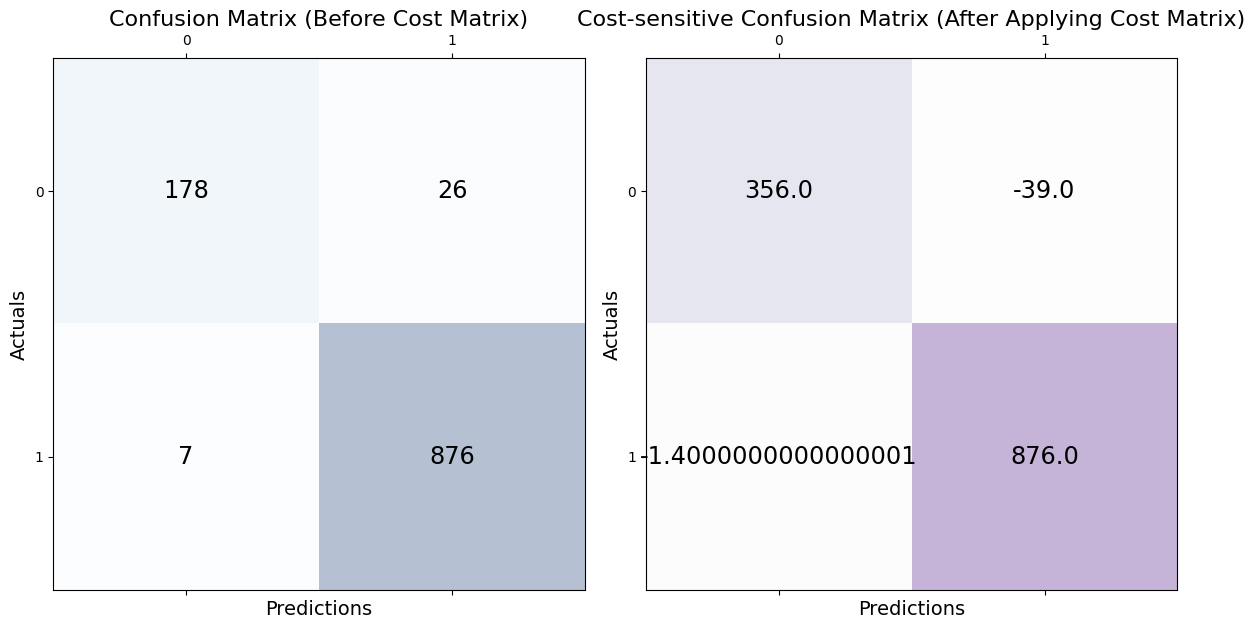

'\nprint("LOGISTIC REGRESSION")\nstart = time.time()\nlr = LogisticRegression()\nlr.fit(x_train, y_train)\nend = time.time()\n\n# Assuming you have a cost matrix, call the function with it\noriginal_acc, cost_acc = print_performance2(y_test, lr, \'LOGISTIC REGRESSION\', cost_matrix=my_cost_matrix)\n\n# Optionally store the algorithm time and plot performance comparison later\nalgo_time[\'LOGISTIC REGRESSION\'] = end - start\n'

In [51]:
"""
# Define the cost matrix (example: penalizing false negatives more)
cost_matrix = np.array([[1, -0.5],  # Actual Negative: TN=0, FP=1
                        [-1, 1]]) # Actual Positive: FN=5, TP=0

# Train Logistic Regression Model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Print the performance with cost-sensitive evaluation
print_performance2(y_test, lr, 'LOGISTIC REGRESSION', cost_matrix)
"""


# Define a cost matrix (penalizing false negatives more)
cost_matrix = np.array([[2, -1.5],  # Actual Negative: TN=0, FP=1
                        [-0.2, 1]]) # Actual Positive: FN=5, TP=0

# Train Logistic Regression Model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Print the performance with both original and cost-sensitive results side by side
print_performance2(y_test, lr, 'LOGISTIC REGRESSION', cost_matrix)








"""
print("LOGISTIC REGRESSION")
start = time.time()
lr = LogisticRegression()
lr.fit(x_train, y_train)
end = time.time()

# Assuming you have a cost matrix, call the function with it
original_acc, cost_acc = print_performance2(y_test, lr, 'LOGISTIC REGRESSION', cost_matrix=my_cost_matrix)

# Optionally store the algorithm time and plot performance comparison later
algo_time['LOGISTIC REGRESSION'] = end - start
"""

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, mean_squared_error,
    r2_score, accuracy_score, precision_score, recall_score
)
from imblearn.metrics import geometric_mean_score
import seaborn as sns
import plotly.graph_objects as go

def evaluate_cost_sensitive_model(model, x_test, y_test, threshold=0.3, clf_name="Model"):
    global results_before, results_after

    # ---- BEFORE COST MATRIX ----
    y_pred_default = model.predict(x_test)
    cm_default = confusion_matrix(y_test, y_pred_default)

    acc_default = accuracy_score(y_test, y_pred_default) * 100
    r2_default = r2_score(y_test, y_pred_default) * 100
    mse_default = mean_squared_error(y_test, y_pred_default) * 100
    roc_default = roc_auc_score(y_test, y_pred_default) * 100
    prec_default = precision_score(y_test, y_pred_default) * 100
    recall_default = recall_score(y_test, y_pred_default) * 100
    spec_default = cm_default[0,0] / (cm_default[0,0] + cm_default[0,1]) * 100
    gmean_default = geometric_mean_score(y_test, y_pred_default) * 100

    # ---- AFTER COST (via THRESHOLD) ----
    y_probs = model.predict_proba(x_test)[:,1]
    y_pred_thresh = (y_probs >= threshold).astype(int)
    cm_thresh = confusion_matrix(y_test, y_pred_thresh)

    acc_thresh = accuracy_score(y_test, y_pred_thresh) * 100
    r2_thresh = r2_score(y_test, y_pred_thresh) * 100
    mse_thresh = mean_squared_error(y_test, y_pred_thresh) * 100
    roc_thresh = roc_auc_score(y_test, y_pred_thresh) * 100
    prec_thresh = precision_score(y_test, y_pred_thresh) * 100
    recall_thresh = recall_score(y_test, y_pred_thresh) * 100
    spec_thresh = cm_thresh[0,0] / (cm_thresh[0,0] + cm_thresh[0,1]) * 100
    gmean_thresh = geometric_mean_score(y_test, y_pred_thresh) * 100

    # ---- STORE RESULTS ----
    results_before = {
        "Accuracy": acc_default, "R2": r2_default, "MSE": mse_default,
        "ROC AUC": roc_default, "Precision": prec_default, "Sensitivity": recall_default,
        "Specificity": spec_default, "G-Mean": gmean_default
    }

    results_after = {
        "Accuracy": acc_thresh, "R2": r2_thresh, "MSE": mse_thresh,
        "ROC AUC": roc_thresh, "Precision": prec_thresh, "Sensitivity": recall_thresh,
        "Specificity": spec_thresh, "G-Mean": gmean_thresh
    }

    # ---- PRINT REPORT ----
    print(f"\n📊 Classification Report ({clf_name}) BEFORE Cost Matrix:\n", classification_report(y_test, y_pred_default))
    print(f"\n📊 Classification Report ({clf_name}) AFTER Cost Matrix:\n", classification_report(y_test, y_pred_thresh))

    # ---- PLOT CONFUSION MATRICES SIDE BY SIDE ----
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.heatmap(cm_default, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title("Before Cost Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    sns.heatmap(cm_thresh, annot=True, fmt="d", cmap="Greens", ax=axes[1])
    axes[1].set_title("After Cost Matrix (Threshold)")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

    # ---- PLOT METRIC COMPARISON BAR GRAPH ----
    fig = go.Figure(data=[
        go.Bar(name='Before Cost Matrix', x=list(results_before.keys()), y=list(results_before.values()), marker_color='indianred'),
        go.Bar(name='After Cost Matrix', x=list(results_after.keys()), y=list(results_after.values()), marker_color='seagreen')
    ])
    fig.update_layout(title=f"{clf_name} Metric Comparison Before vs After Cost Matrix",
                      xaxis_title="Metrics", yaxis_title="Percentage", barmode='group')
    fig.show()



📊 Classification Report (Logistic Regression) BEFORE Cost Matrix:
               precision    recall  f1-score   support

           0       0.96      0.87      0.92       204
           1       0.97      0.99      0.98       883

    accuracy                           0.97      1087
   macro avg       0.97      0.93      0.95      1087
weighted avg       0.97      0.97      0.97      1087


📊 Classification Report (Logistic Regression) AFTER Cost Matrix:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89       204
           1       0.96      1.00      0.98       883

    accuracy                           0.96      1087
   macro avg       0.97      0.91      0.94      1087
weighted avg       0.96      0.96      0.96      1087



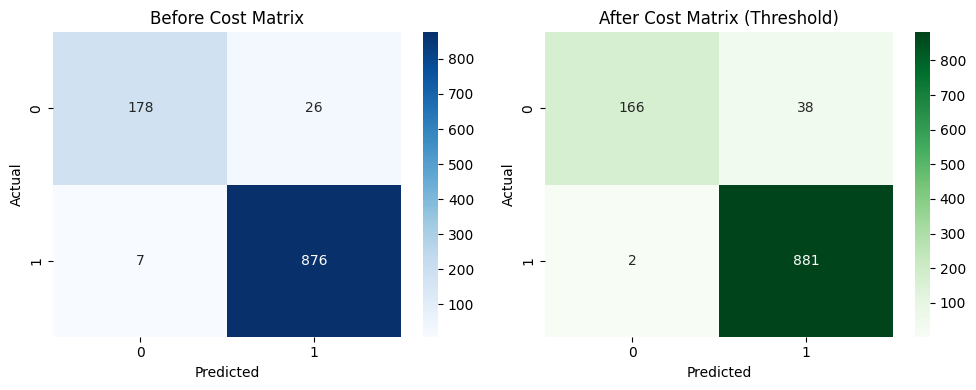

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

evaluate_cost_sensitive_model(model, x_test, y_test, threshold=0.3, clf_name="Logistic Regression")





## K-NEAREST NEIGHBOURS 

In [38]:
start = time.time()
knn = KNeighborsClassifier()
# assigning the dictionary of variables whose optimium value is to be retrieved
param_grid = {'n_neighbors' : np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
# training the model with the training data and best parameter
knn_cv.fit(x_train,y_train)
end=time.time()
algo_time['K-NEAREST NEIGHBOURS']=end-start

c:\Users\komal kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning:

invalid value encountered in cast



In [39]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

The best paramter we have is: {'n_neighbors': np.int64(2)}
The best score we have achieved is: 0.981595439334418


K-NEAREST NEIGHBOURS
ROC_AUC value: 93.23107498945218 % 

Mean Squared Error: 3.035878564857406 %

R2 score is: 80.08627006861634 %

Accuracy Score: 97.03243616287095 %

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.92       204
           1       0.97      0.99      0.98       883

    accuracy                           0.97      1087
   macro avg       0.97      0.93      0.95      1087
weighted avg       0.97      0.97      0.97      1087


Confusion Matrix (Before Applying Cost Matrix):
[[178  26]
 [  7 876]]

Cost-sensitive Confusion Matrix (After Applying Cost Matrix):
[[356.  -39. ]
 [ -1.4 876. ]]

Total Cost (after applying cost matrix): 1191.6


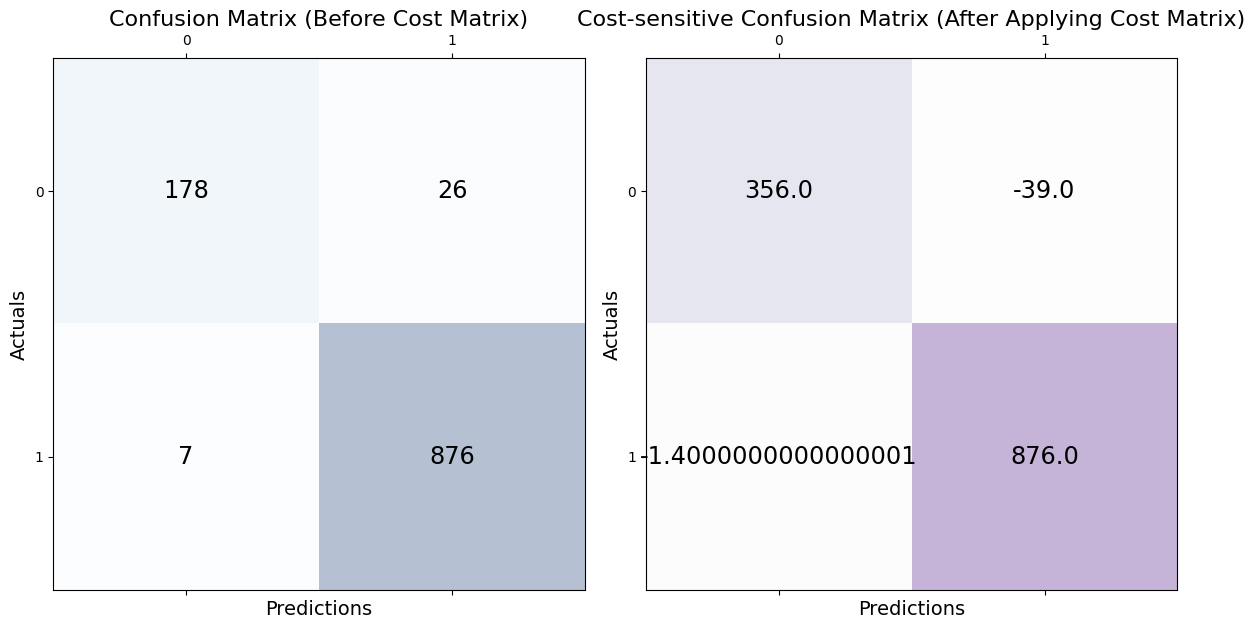

In [53]:
print("K-NEAREST NEIGHBOURS")
"""
cost_matrix = np.array([[1, -0.5],  # Actual Negative: TN=0, FP=1
                        [-2, 1]]) # Actual Positive: FN=5, TP=0

# Call the performance evaluation function and pass the cost matrix to it
print_performance2(y_test, knn_cv, 'K-NEAREST NEIGHBOURS', threshold=0.3)


                        [-2, 1]]) # Actual Positive: FN=5, TP=0
"""
cost_matrix = np.array([[2, -1.5],  # Actual Negative: TN=0, FP=1
                        [-0.2, 1]]) # Actual Positive: FN=5, TP=0
# Train Logistic Regression Model
knn_cv = LogisticRegression()
knn_cv.fit(x_train, y_train)

# Print the performance with both original and cost-sensitive results side by side
print_performance2(y_test, knn_cv, 'LOGISTIC REGRESSION', cost_matrix)





## RANDOM FOREST

In [46]:
rf_start=time.time()
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
rf_end=time.time()
algo_time['RANDOM FOREST TREE']=rf_end-rf_start

c:\Users\komal kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning:

invalid value encountered in cast



In [47]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(CV_rfc.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(CV_rfc.best_score_*100))

The best paramter we have is: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
The best score we have achieved is: 98.13652897371796


RANDOM FOREST TREE
ROC_AUC value: 96.94474052361602 % 

Mean Squared Error: 2.2079116835326587 %

R2 score is: 85.51728732263008 %

Accuracy Score: 98.38969404186795 %

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       204
           1       0.99      0.98      0.99       883

    accuracy                           0.98      1087
   macro avg       0.96      0.97      0.96      1087
weighted avg       0.98      0.98      0.98      1087


Confusion Matrix (Before Applying Cost Matrix):
[[195   9]
 [ 15 868]]

Cost-sensitive Confusion Matrix (After Applying Cost Matrix):
[[390.  -13.5]
 [ -3.  868. ]]

Total Cost (after applying cost matrix): 1241.5


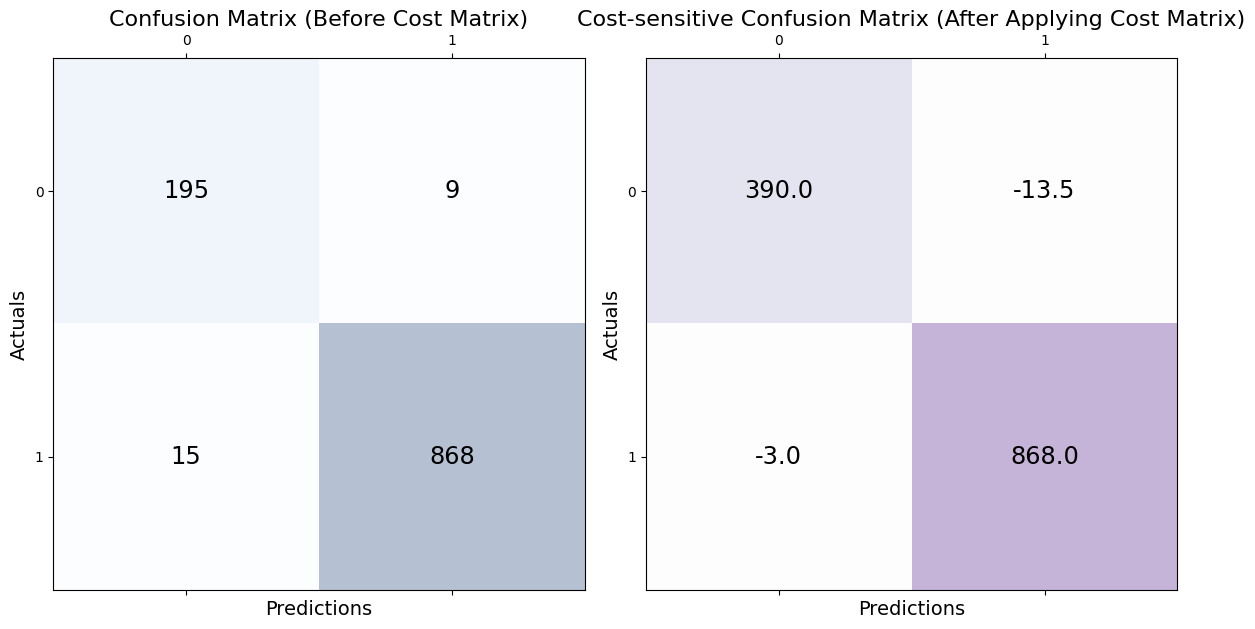

In [55]:
print("RANDOM FOREST TREE")
cost_matrix = np.array([[2, -1.5],  # Actual Negative: TN=0, FP=1
                        [-0.2, 1]]) # Actual Positive: FN=5, TP=0
print_performance2(y_test,CV_rfc,'RANDOM FOREST TREE', cost_matrix)




#acc = CV_rfc.score(x_train, y_train)*100
#accuracies['RANDOM FOREST TREE'] = acc

## GRADIENT BOOSTING CLASSIFIER

### Decision Tree

### Naive bayes

colors = ["purple", "green", "orange", "blue", "red", "yellow", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=90)
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [ ]:
!conda install -c plotly plotly
!pip install colorama

'conda' is not recognized as an internal or external command,
operable program or batch file.



[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import plotly.express as px
fig = px.bar(x=list(accuracies.keys()), y=list(accuracies.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Accuracy Comparision", xaxis_title="Model", yaxis_title="Accuracy")
fig.show()

In [ ]:
fig = px.bar(x=list(algo_time.keys()), y=list(algo_time.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Algorithm Time Comparision", xaxis_title="Model", yaxis_title="")
fig.show()

In [ ]:
fig = px.bar(x=list(r2_scores.keys()), y=list(r2_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="R2 Score Comparision", xaxis_title="Model", yaxis_title="R2 Scores")
fig.show()

In [ ]:
fig = px.bar(x=list(mean_squared_errors.keys()), y=list(mean_squared_errors.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Mean Squared Error Comparision", xaxis_title="Model", yaxis_title="Mean Squared Error")
fig.show()

In [ ]:
fig = px.bar(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="ROC Score Comparision", xaxis_title="Model", yaxis_title="ROC Scores")
fig.show()

In [ ]:
"""
import plotly.graph_objects as go
Algos=list(roc_auc_scores.keys())

fig = go.Figure(data=[
    go.Bar(name='Accuracies', x=Algos, y=list(accuracies.values())),
    go.Bar(name='R2 scores', x=Algos, y=list(r2_scores.values())),
    go.Bar(name='Mean Squared Errors', x=Algos, y=list(mean_squared_errors.values())),
    go.Bar(name='ROC Auc Scores', x=Algos, y=list(roc_auc_scores.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()"""
import plotly.graph_objects as go

models = list(gmeans_before.keys())

fig = go.Figure(data=[
    go.Bar(name='G-Mean (Before)', x=models, y=[gmeans_before[m] for m in models]),
    go.Bar(name='G-Mean (After)', x=models, y=[gmeans_after[m] for m in models]),
    
    go.Bar(name='Precision (Before)', x=models, y=[precisions_before[m] for m in models]),
    go.Bar(name='Precision (After)', x=models, y=[precisions_after[m] for m in models]),
    
    go.Bar(name='Sensitivity (Before)', x=models, y=[recalls_before[m] for m in models]),
    go.Bar(name='Sensitivity (After)', x=models, y=[recalls_after[m] for m in models]),
    
    go.Bar(name='Specificity (Before)', x=models, y=[specificities_before[m] for m in models]),
    go.Bar(name='Specificity (After)', x=models, y=[specificities_after[m] for m in models]),
])

fig.update_layout(
    title='Comparison of Metrics Before and After Applying Cost Matrix',
    xaxis_title='Model',
    yaxis_title='Score',
    barmode='group'
)
fig.show()


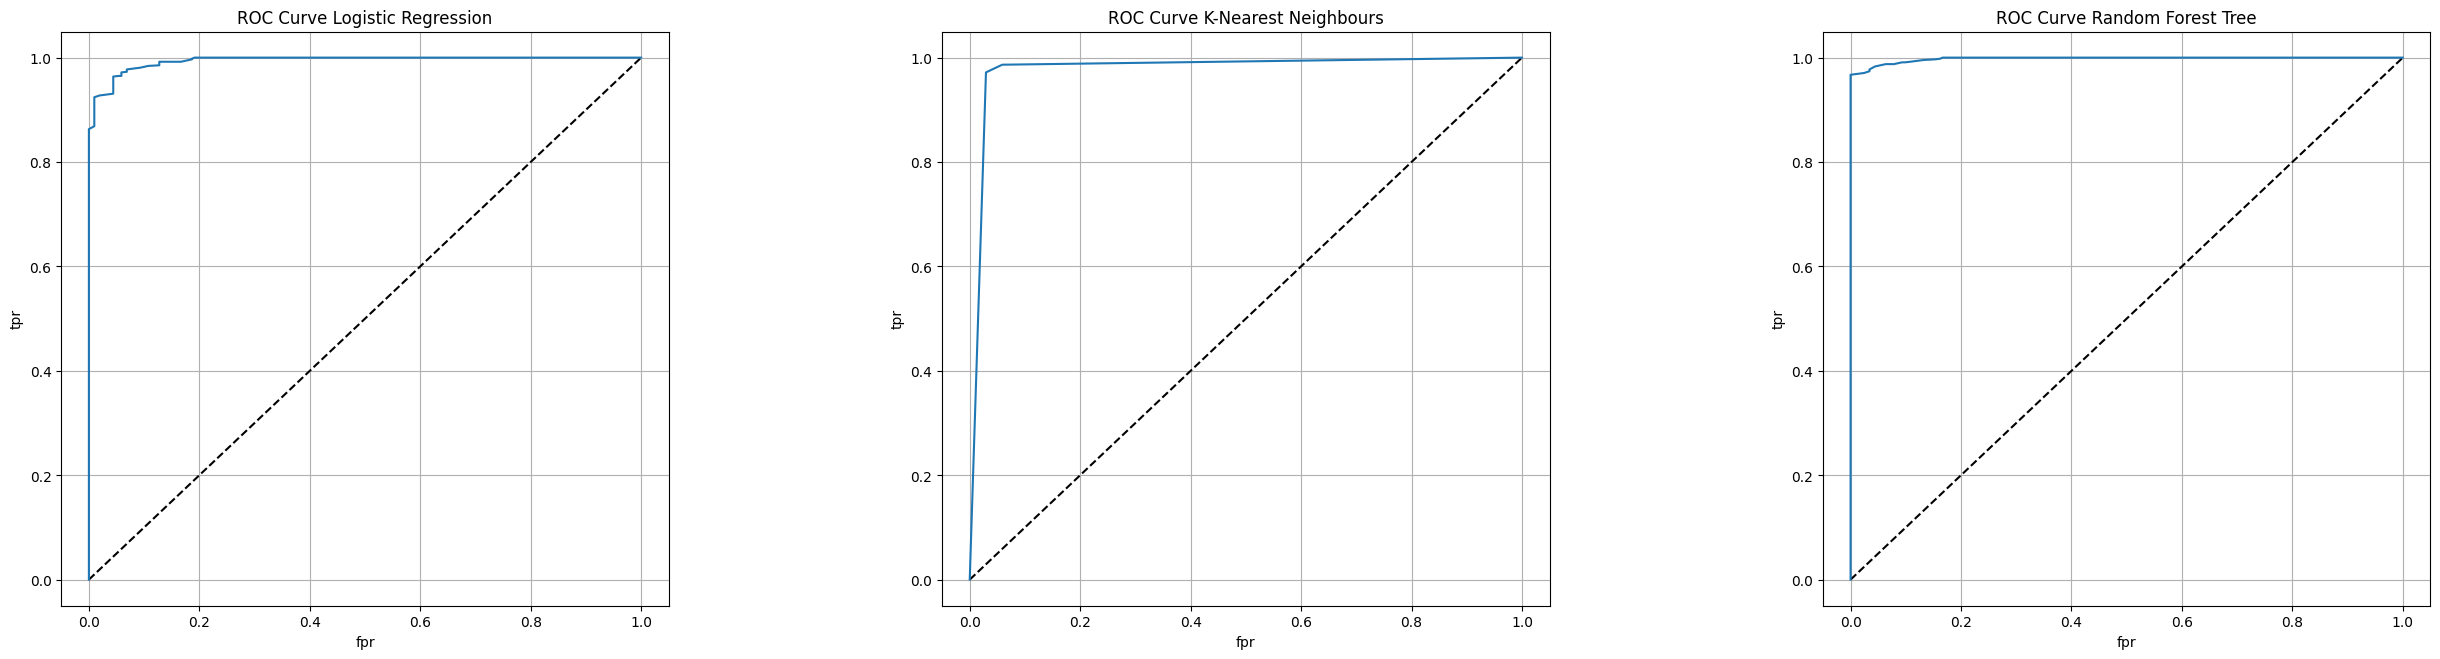

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(25,16))
# Logistic Regression Classification
Y_predict1_proba = lr.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(441)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)

Y_predict1_proba = knn_cv.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(442)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve K-Nearest Neighbours')
plt.grid(True)

Y_predict1_proba = CV_rfc.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(443)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest Tree')
plt.grid(True)

plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()

In [ ]:
import colorama
from colorama import Fore


print("COVID PREDICTION BASED ON ML ALGORITHMS")
print("Enter 1 for Yes and 0 for No")
Breathing_Problem = 1 #int(input("Does the patient have breathing problem ? "))
Fever = 0 #int(input("Does the patient have fever ? "))
Dry_Cough =1  #int(input("Does the patient have dry cough ? "))
Sore_throat =1  #int(input("Does the patient have sore throat ? "))
Running_Nose =0  #int(input("Does the patient have running nose ? ")) 
Asthma =0  #int(input("Does the patient have any record of asthma ? ")) 
Chronic_Lung_Disease =1  #int(input("Does the patient have any records of chronic lung disease ? ")) 
Headache =0 #int(input("Is the patient having headche ? "))
Heart_Disease =0 #int(input("Does the patient have any record of any heart disease ? "))
Diabetes =1 #int(input("Does the patient have diabetes ? "))
Hyper_Tension =1 #int(input("Does the patient have hyper tension ? ")) 
Fatigue =1 #int(input("Does the patient experience fatigue ? "))
Gastrointestinal =1 #int(input("Does the patient have any gastrointestinal disorders ? "))
Abroad_travel =1 #int(input("Has the patient travelled abroad recently ? "))
Contact_with_COVID_Patient =0 #int(input("Was the patient in contact with a covid patient recently ? "))
Attended_Large_Gathering =0 #int(input("Did the patient attend any large gathering event recently ? "))
Visited_Public_Exposed_Places =1 #int(input("Did the patient visit any public exposed places recently ? "))
Family_working_in_Public_Exposed_Places =0 #int(input("Does the patient have any family member working in public exposed places ? "))

patient = [[Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places]]


result = knn_cv.predict(patient)
print("\nResults : ",result)

if result == 1:
    print(Fore.RED + 'You may be affected with COVID-19 virus! Please get RTPCR test ASAP and stay in Quarantine for 14 days!')
    print()
else :
    print(Fore.GREEN + 'You do not have any symptoms of COVID-19. Stay home! Stay safe!')
    print()

COVID PREDICTION BASED ON ML ALGORITHMS
Enter 1 for Yes and 0 for No

Results :  [1]
You may be affected with COVID-19 virus! Please get RTPCR test ASAP and stay in Quarantine for 14 days!



c:\Users\komal kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

